In [37]:
import rasterio as rio
from rasterio.plot import show
from utils.geotif_io import readTiff
import gdal
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt


In [38]:
path_dem_wgs84 = "notebooks/tmp_srtm_wgs84.tif"
path_dem_albers = "notebooks/tmp_srtm_albers.tif"
path_dem_albers_2 = "notebooks/tmp_srtm_albers_2.tif"


In [39]:
dem_wgs84, dem_wgs84_info = readTiff(path_dem_wgs84)
dem_albers, dem_albers_info = readTiff(path_dem_albers)
dem_albers_2, dem_albers_2_info = readTiff(path_dem_albers_2)


In [41]:
dem_albers_info


{'geoextent': (-951746.6194150194,
  -846686.6194150194,
  3210578.407461416,
  3331418.407461416),
 'geotrans': (-951746.6194150194, 30.0, 0.0, 3331418.407461416, 0.0, -30.0),
 'geosrs': '9122',
 'row': 4028,
 'col': 3502,
 'bands': 1}

In [42]:
dem_albers_2_info


{'geoextent': (-951746.6194150194,
  -846687.1015501632,
  3210571.0994119234,
  3331418.407461416),
 'geotrans': (-951746.6194150194,
  28.86250490792753,
  0.0,
  3331418.407461416,
  0.0,
  -28.86250490792753),
 'geosrs': '9122',
 'row': 4187,
 'col': 3640,
 'bands': 1}

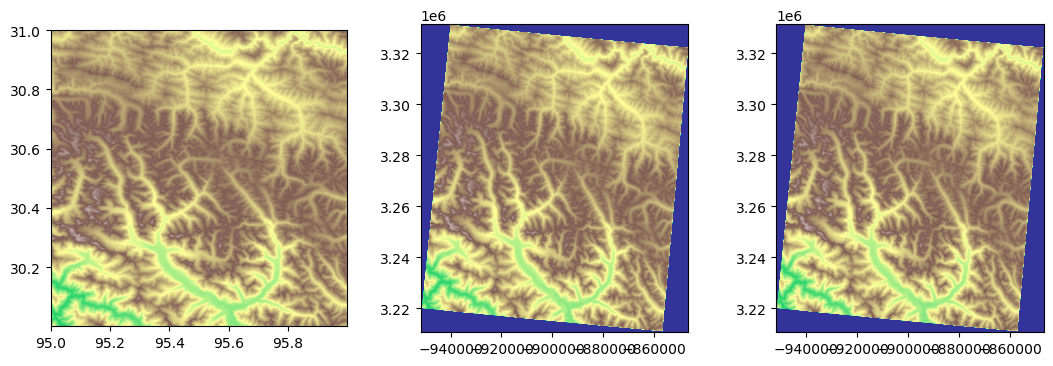

In [43]:
plt.figure(figsize=(13, 4))
plt.subplot(1,3,1)
plt.imshow(dem_wgs84, vmin=0, vmax=7000, extent=dem_wgs84_info['geoextent'], cmap='terrain')
plt.subplot(1,3,2)
plt.imshow(dem_albers, vmin=0, vmax=7000, extent=dem_albers_info['geoextent'], cmap='terrain')
plt.subplot(1,3,3)
plt.imshow(dem_albers_2, vmin=0, vmax=7000, extent=dem_albers_2_info['geoextent'], cmap='terrain')



In [7]:
dem.crs


CRS.from_epsg(4326)

In [37]:
dem_path_albers = "notebooks/tmp_srtm_albers.tif"
dem_albers = rio.open(dem_path)
dem_albers.crs


CRS.from_epsg(4326)

In [36]:
!gdalinfo 'notebooks/tmp_srtm_albers.tif'


Driver: GTiff/GeoTIFF
Files: notebooks/tmp_srtm_albers.tif
Size is 4269, 3872
Coordinate System is:
BOUNDCRS[
    SOURCECRS[
        PROJCRS["NAD83 / Conus Albers",
            BASEGEOGCRS["NAD83",
                DATUM["North American Datum 1983",
                    ELLIPSOID["GRS 1980",6378137,298.257222101,
                        LENGTHUNIT["metre",1]]],
                PRIMEM["Greenwich",0,
                    ANGLEUNIT["degree",0.0174532925199433]],
                ID["EPSG",4269]],
            CONVERSION["Conus Albers",
                METHOD["Albers Equal Area",
                    ID["EPSG",9822]],
                PARAMETER["Latitude of false origin",23,
                    ANGLEUNIT["degree",0.0174532925199433],
                    ID["EPSG",8821]],
                PARAMETER["Longitude of false origin",-96,
                    ANGLEUNIT["degree",0.0174532925199433],
                    ID["EPSG",8822]],
                PARAMETER["Latitude of 1st standard parallel",29.5,
    

In [9]:
!gdalinfo $dem_path 


Driver: GTiff/GeoTIFF
Files: notebooks/tmp_srtm_wgs84.tif
Size is 3600, 3600
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (94.999861111147595,31.000138888885044)
Pixel Size = (0.000277777777778,-0.000277777777778)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  94.9998611,  31.0001389) ( 94d59'59.50"

In [11]:
dem.meta


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -32768.0,
 'width': 3600,
 'height': 3600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00027777777777781464, 0.0, 94.9998611111476,
        0.0, -0.00027777777777781464, 31.000138888885044)}

In [12]:
inputTIF = 'notebooks/tmp_srtm_wgs84.tif'
projTIF = 'notebooks/tmp_srtm_wgs84_reproj.tif'


In [17]:
new_crs = {'init': 'epsg:5070'}
dst_crs = new_crs

with rio.open(inputTIF) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(projTIF, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)


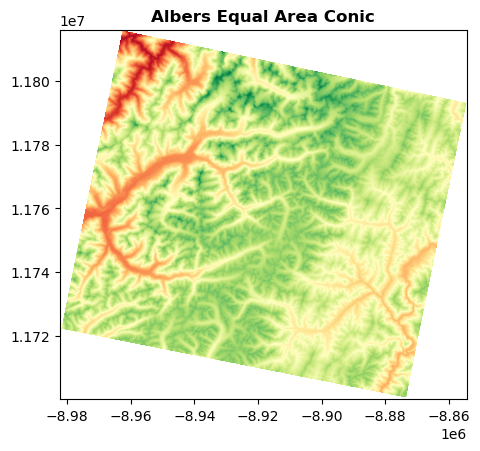

In [18]:
with rio.open(projTIF) as src:
    show(src, title='Albers Equal Area Conic', cmap='RdYlGn')


In [25]:
dem_proj, dem_proj_info = readTiff(projTIF)
dem_proj_info



{'geoextent': (-8982369.477727046,
  -8854296.502934508,
  11700038.257703928,
  11816211.538775586),
 'geotrans': (-8982369.477727046,
  28.812817726105468,
  0.0,
  11816211.538775586,
  0.0,
  -28.812817726105468),
 'geosrs': '5070',
 'row': 4032,
 'col': 4445,
 'bands': 1}

In [20]:
dem_proj=rio.open(projTIF)
dem_proj.meta



{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -32768.0,
 'width': 4445,
 'height': 4032,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(28.812817726105468, 0.0, -8982369.477727046,
        0.0, -28.812817726105468, 11816211.538775586)}

In [19]:
!gdalinfo $projTIF

Driver: GTiff/GeoTIFF
Files: notebooks/tmp_srtm_wgs84_reproj.tif
Size is 4445, 4032
Coordinate System is:
BOUNDCRS[
    SOURCECRS[
        PROJCRS["NAD83 / Conus Albers",
            BASEGEOGCRS["NAD83",
                DATUM["North American Datum 1983",
                    ELLIPSOID["GRS 1980",6378137,298.257222101,
                        LENGTHUNIT["metre",1]]],
                PRIMEM["Greenwich",0,
                    ANGLEUNIT["degree",0.0174532925199433]],
                ID["EPSG",4269]],
            CONVERSION["Conus Albers",
                METHOD["Albers Equal Area",
                    ID["EPSG",9822]],
                PARAMETER["Latitude of false origin",23,
                    ANGLEUNIT["degree",0.0174532925199433],
                    ID["EPSG",8821]],
                PARAMETER["Longitude of false origin",-96,
                    ANGLEUNIT["degree",0.0174532925199433],
                    ID["EPSG",8822]],
                PARAMETER["Latitude of 1st standard parallel",29.5

In [21]:
def reproject_et(inpath, outpath, new_crs):
    dst_crs = new_crs # CRS for web meractor 

    with rio.open(inpath) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(outpath, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)


In [22]:
reproject_et(inpath = 'notebooks/tmp_srtm_wgs84.tif', 
              outpath = 'notebooks/tmp_srtm_albers_2.tif', 
              # new_crs = "+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
              new_crs = '+proj=aea +ellps=krass +lon_0=105 +lat_1=25 +lat_2=47'              
              )



In [23]:
!gdalinfo 'notebooks/tmp_srtm_albers_2.tif'


Driver: GTiff/GeoTIFF
Files: notebooks/tmp_srtm_albers_2.tif
Size is 3640, 4187
Coordinate System is:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["Unknown_based_on_Krassovsky_1942_ellipsoid",
            ELLIPSOID["Krassovsky, 1942",6378245,298.3,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]],
    CONVERSION["unnamed",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",105,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",25,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard pa

In [34]:
dem_proj_2 = rio.open('notebooks/tmp_srtm_wgs84_reproj_2.tif')
dem_proj_2.meta


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -32768.0,
 'width': 4548,
 'height': 3923,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["unknown",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",20],PARAMETER["standard_parallel_2",60],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(29.023790701324355, 0.0, -8610975.524924131,
        0.0, -29.023790701324355, 9468517.139259169)}